Testing Random information:
Trial 1:
Initial generation: Molecule: Cc1c(C(C)(C)C)nc(-c2ccc(NC(=O)c3cc(OC)c(OC)cc3)cc2)c(NC(=O)Nc2c(C)cccc2C)n1
 | Binding affinity: -8.47
Iteration 1: Molecule: Cc1c(C(C)(C)C)nc(-c2ccc(NC(=O)c3cc(OC)c(OC)cc3)cc2)c(NC(=O)Nc2cc(C)c(C)cc2C)n1
 | Binding affinity: -8.6
Iteration 2: Molecule: Cc1c(C(C)(C)C)nc(-c2ccc(NC(=O)c3cc(OC)c(OC)cc3)cc2)c(NC(=O)Nc2c(C)cccc2Cl)n1
 | Binding affinity: -8.46
Iteration 3: Molecule: Cc1c(C(C)(C)C)nc(-c2ccc(NC(=O)c3cc(OC)c(OC)cc3)cc2)c(NC(=O)Nc2cc(F)c(C)cc2C)n1
 | Binding affinity: -8.13
Best ligand: Cc1c(C(C)(C)C)nc(-c2ccc(NC(=O)c3cc(OC)c(OC)cc3)cc2)c(NC(=O)Nc2cc(C)c(C)cc2C)n1
 with binding affinity -8.6 at iteration 1


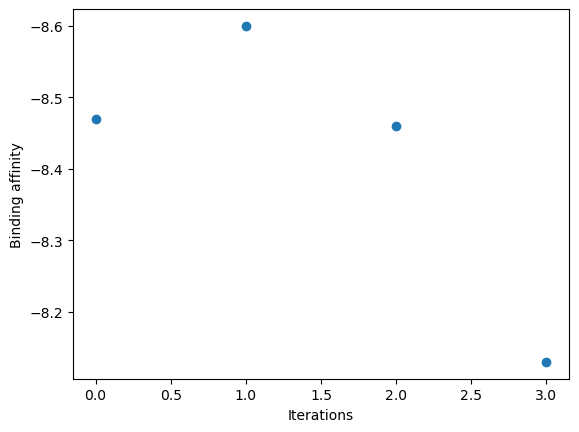

PCC: 0.7472216866249641 | P-value: 0.25277831337503587
Random information stats:  {'best_affinity': -8.6, 'best_molecule': 'Cc1c(C(C)(C)C)nc(-c2ccc(NC(=O)c3cc(OC)c(OC)cc3)cc2)c(NC(=O)Nc2cc(C)c(C)cc2C)n1\n', 'best_pcc': np.float64(0.7472216866249641), 'avg_affinity': -8.6, 'avg_best_iteration': 1.0, 'avg_pcc': np.float64(0.7472216866249641), 'avg_runtime': 77.61337280273438}


In [1]:
import base64
from google import genai
from google.genai import types
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

from api import get_docking_data
from inference_loop import inference

protein = "c-met"
num_trials = 30

def test_configuration(information, num_trials, num_iterations_per_trial):
    print(f"Testing {information} information:")
    best_affinity = float('inf')
    best_molecule = ""
    best_pcc = float('inf')
    avg_affinity = 0
    avg_best_iteration = 0
    avg_pcc = 0
    avg_runtime = 0
    for i in range(num_trials):
        print(f"Trial {i+1}:")
        results = inference(protein, num_iterations=num_iterations_per_trial, information=information)
        if results["best_affinity"]<best_affinity:
            best_affinity = results["best_affinity"]
            best_molecule = results["best_molecule"]
        if results["pcc"] < best_pcc:
            best_pcc = results["pcc"]
        avg_affinity += (results["best_affinity"]/num_trials)
        avg_best_iteration += (results["best_iteration"]/num_trials)
        avg_pcc += (results["pcc"]/num_trials)
        avg_runtime += (results["execution_time"]/num_trials)
    stats = {"best_affinity": best_affinity, "best_molecule": best_molecule, 
             "best_pcc": best_pcc, "avg_affinity": avg_affinity,
             "avg_best_iteration":avg_best_iteration, "avg_pcc":avg_pcc, "avg_runtime":avg_runtime}
    print(f"{information} information stats: ", stats)
    return stats
    
# basic_test_stats = test_configuration(information="Basic", num_trials=num_trials, num_iterations_per_trial=25)
extra_data_test_stats = test_configuration(information="Extra", num_trials=num_trials, num_iterations_per_trial=25)
# random_test_stats = test_configuration(information="Random", num_trials=num_trials, num_iterations_per_trial=25)

In [2]:
from scipy.stats import pearsonr
print(basic_test_stats)
print(extra_data_test_stats)

(-13.45, 'Cc1c(C(=O)Nc2cc(Cl)cc(Cl)c2)c(-c2cnc(N(Cc3ccc(CN)cc3)Cc4cc(Cl)cc(Cl)c4)nc2)c[nH]n1\n', np.float64(-0.8383780469864707), np.float64(1.677230560909288e-07), -10.333, 16.8, np.float64(-0.229057834874059), np.float64(0.294019050953966), 538.5213061094285)
(-12.93, 'Cc1cc(C)c(NC(=O)c2cc(Cl)cc(Cl)c2Nc3ncc(NC(=O)c4c[nH]c5ccccc45)cc3-c3c(O)ncn3)cc(C)c1Cl\n', np.float64(-0.789122841261863), np.float64(2.760056714350675e-06), -10.514000000000001, 18.3, np.float64(-0.3278803093809402), np.float64(0.1938652189866187), 648.6398192167283)
